## Data Cleaning and Preprocessing

### Data Cleaning

In [10]:
import pandas as pd
import numpy as np
import os

In [11]:
data_path = "data/raw"   

files = [
    "Constructor_Performance.csv",
    "Constructor_Rankings.csv",
    "Driver_Details.csv",
    "Driver_Rankings.csv",
    "Lap_Timings.csv",
    "Pit_Stop_Records.csv",
    "Qualifying_Results.csv",
    "Race_Results.csv",
    "Race_Schedule.csv",
    "Race_Status.csv",
    "Season_Summaries.csv",
    "Sprint_Race_Results.csv",
    "Team_Details.csv",
    "Track_Information.csv"
]

dfs = {f.replace(".csv", ""): pd.read_csv(os.path.join(data_path, f), low_memory=False) for f in files}

print(f" {len(dfs)} dataset berhasil dimuat.")

✅ 14 dataset berhasil dimuat.


In [12]:
def clean_columns(df):
    df.columns = (
        df.columns
        .str.strip()
        .str.replace(" ", "_")
        .str.replace("-", "_")
        .str.replace("(", "")
        .str.replace(")", "")
        .str.lower()
    )
    return df

dfs = {name: clean_columns(df) for name, df in dfs.items()}
print(" Nama kolom telah dinormalisasi.")

✅ Nama kolom telah dinormalisasi.


In [13]:
qual = dfs["Qualifying_Results"]

# missing value check
print("\nSebelum imputasi missing values:")
print(qual.isna().sum())

# karena q2 dan q3 kosong untuk pembalap yang tidak lolos ke sesi tersebut, maka isi dengan "DNQ" (Did Not Qualify)
qual["q2"] = qual["q2"].fillna("DNQ")
qual["q3"] = qual["q3"].fillna("DNQ")

dfs["Qualifying_Results"] = qual

print("\nSetelah imputasi missing values:")
print(qual.isna().sum())


Sebelum imputasi missing values:
qualifyid         0
raceid            0
driverid          0
constructorid     0
number            0
position          0
q1                0
q2               13
q3               27
dtype: int64

Setelah imputasi missing values:
qualifyid        0
raceid           0
driverid         0
constructorid    0
number           0
position         0
q1               0
q2               0
q3               0
dtype: int64


In [14]:
schedule = dfs["Race_Schedule"]
date_cols = ["date", "fp1_date", "fp2_date", "fp3_date", "quali_date", "sprint_date"]

for col in date_cols:
    if col in schedule.columns:
        schedule[col] = pd.to_datetime(schedule[col], errors="coerce")

dfs["Race_Schedule"] = schedule
print("\n Kolom tanggal di Race_Schedule telah dikonversi ke datetime.")


✅ Kolom tanggal di Race_Schedule telah dikonversi ke datetime.


In [15]:
for name, df in dfs.items():
    n_before = len(df)
    df = df.drop_duplicates()
    n_after = len(df)
    dfs[name] = df
    if n_before != n_after:
        print(f"⚠️ {name}: {n_before - n_after} duplikat dihapus.")
print(" Pemeriksaan duplikasi selesai.")

✅ Pemeriksaan duplikasi selesai.


In [16]:
if "driver_details" in dfs:
    dfs["Driver_Details"]["forename"] = dfs["Driver_Details"]["forename"].str.lower()
    dfs["Driver_Details"]["surname"] = dfs["Driver_Details"]["surname"].str.lower()

if "team_details" in dfs:
    dfs["Team_Details"]["name"] = dfs["Team_Details"]["name"].str.lower()

print(" Normalisasi teks selesai.")

✅ Normalisasi teks selesai.


In [17]:
print("\nRingkasan setelah cleaning:")
for name, df in dfs.items():
    print(f"{name:25s} | rows: {len(df):7d} | cols: {df.shape[1]:2d} | missing: {df.isna().sum().sum():4d}")


# save

output_path = "data/processed"
os.makedirs(output_path, exist_ok=True)

for name, df in dfs.items():
    df.to_csv(os.path.join(output_path, f"{name}_clean.csv"), index=False)

print(f"\n Semua file hasil cleaning disimpan di folder: {output_path}")


Ringkasan setelah cleaning:
Constructor_Performance   | rows:   12505 | cols:  5 | missing:    0
Constructor_Rankings      | rows:   13271 | cols:  7 | missing:    0
Driver_Details            | rows:     859 | cols:  9 | missing:    0
Driver_Rankings           | rows:   34595 | cols:  7 | missing:    0
Lap_Timings               | rows:  575029 | cols:  6 | missing:    0
Pit_Stop_Records          | rows:   10990 | cols:  7 | missing:    0
Qualifying_Results        | rows:   10254 | cols:  9 | missing:    0
Race_Results              | rows:   26519 | cols: 18 | missing:    0
Race_Schedule             | rows:    1125 | cols: 18 | missing: 5265
Race_Status               | rows:     139 | cols:  2 | missing:    0
Season_Summaries          | rows:      75 | cols:  2 | missing:    0
Sprint_Race_Results       | rows:     300 | cols: 16 | missing:    0
Team_Details              | rows:     212 | cols:  5 | missing:    0
Track_Information         | rows:      77 | cols:  9 | missing:    0

✅ Se

In [18]:
import pandas as pd
import os

race_schedule = pd.read_csv("data/raw/Race_Schedule.csv")

missing_summary = race_schedule.isnull().sum().to_frame('missing_count')
missing_summary['missing_pct'] = 100 * missing_summary['missing_count'] / len(race_schedule)
display(missing_summary)

display(race_schedule[race_schedule.isnull().any(axis=1)].head(10))

os.makedirs("data/processed", exist_ok=True)

for name, df in dfs.items():
    df.to_csv(os.path.join(output_path, f"{name}_clean.csv"), index=False)
print(dfs.keys())


,missing_count,missing_pct
raceId,0,0.0
year,0,0.0
round,0,0.0
circuitId,0,0.0
name,0,0.0
date,0,0.0
time,0,0.0
url,0,0.0
fp1_date,0,0.0
fp1_time,0,0.0


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time


dict_keys(['Constructor_Performance', 'Constructor_Rankings', 'Driver_Details', 'Driver_Rankings', 'Lap_Timings', 'Pit_Stop_Records', 'Qualifying_Results', 'Race_Results', 'Race_Schedule', 'Race_Status', 'Season_Summaries', 'Sprint_Race_Results', 'Team_Details', 'Track_Information'])


### Data Integration

In [19]:
import pandas as pd
import numpy as np
import os


In [20]:

processed_path = "data/processed"

dfs = {
    "Race_Results": pd.read_csv(os.path.join(processed_path, "Race_Results_clean.csv")),
    "Driver_Details": pd.read_csv(os.path.join(processed_path, "Driver_Details_clean.csv")),
    "Team_Details": pd.read_csv(os.path.join(processed_path, "Team_Details_clean.csv")),
    "Race_Schedule": pd.read_csv(os.path.join(processed_path, "Race_Schedule_clean.csv")),
    "Track_Information": pd.read_csv(os.path.join(processed_path, "Track_Information_clean.csv"))
}

print(" Dataset berhasil dimuat:")
for name, df in dfs.items():
    print(f"{name:20s} | rows: {len(df):6d} | cols: {df.shape[1]:2d}")

for name, df in dfs.items():
    print(f"\n📄 {name} columns:")
    print(df.columns.tolist())


✅ Dataset berhasil dimuat:
Race_Results         | rows:  26519 | cols: 18
Driver_Details       | rows:    859 | cols:  9
Team_Details         | rows:    212 | cols:  5
Race_Schedule        | rows:   1125 | cols: 18
Track_Information    | rows:     77 | cols:  9

📄 Race_Results columns:
['resultid', 'raceid', 'driverid', 'constructorid', 'number', 'grid', 'position', 'positiontext', 'positionorder', 'points', 'laps', 'time', 'milliseconds', 'fastestlap', 'rank', 'fastestlaptime', 'fastestlapspeed', 'statusid']

📄 Driver_Details columns:
['driverid', 'driverref', 'number', 'code', 'forename', 'surname', 'dob', 'nationality', 'url']

📄 Team_Details columns:
['constructorid', 'constructorref', 'name', 'nationality', 'url']

📄 Race_Schedule columns:
['raceid', 'year', 'round', 'circuitid', 'name', 'date', 'time', 'url', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time']

📄 Track_Information columns:
['circuitid',

In [21]:

processed_path = "data/processed"

dfs = {
    "Race_Results": pd.read_csv(os.path.join(processed_path, "Race_Results_clean.csv")),
    "Driver_Details": pd.read_csv(os.path.join(processed_path, "Driver_Details_clean.csv")),
    "Team_Details": pd.read_csv(os.path.join(processed_path, "Team_Details_clean.csv")),
    "Race_Schedule": pd.read_csv(os.path.join(processed_path, "Race_Schedule_clean.csv")),
    "Track_Information": pd.read_csv(os.path.join(processed_path, "Track_Information_clean.csv"))
}

print(" Dataset berhasil dimuat:")
for name, df in dfs.items():
    print(f"{name:20s} | rows: {len(df):6d} | cols: {df.shape[1]:2d}")

for name in ["Driver_Details", "Team_Details", "Race_Schedule", "Track_Information"]:
    if "url" in dfs[name].columns:
        dfs[name] = dfs[name].rename(columns={"url": f"url_{name.lower()}"})

# data integration

# Race_Results + Driver_Details
merged = pd.merge(
    dfs["Race_Results"],
    dfs["Driver_Details"],
    on="driverid",
    how="left"
)

# + Team_Details
merged = pd.merge(
    merged,
    dfs["Team_Details"],
    on="constructorid",
    how="left"
)

# + Race_Schedule
merged = pd.merge(
    merged,
    dfs["Race_Schedule"],
    on="raceid",
    how="left"
)

# + Track_Information 
if "Track_Information" in dfs:
    merged = pd.merge(
        merged,
        dfs["Track_Information"],
        on="circuitid",
        how="left"
    )

print(f"\n✅ Hasil integrasi data: {merged.shape[0]} baris x {merged.shape[1]} kolom")

# save
output_path = "data/processed"
os.makedirs(output_path, exist_ok=True)
merged.to_csv(os.path.join(output_path, "Integrated_Data.csv"), index=False)

print(f"📂 Data terintegrasi disimpan ke: {output_path}/Integrated_Data.csv")


✅ Dataset berhasil dimuat:
Race_Results         | rows:  26519 | cols: 18
Driver_Details       | rows:    859 | cols:  9
Team_Details         | rows:    212 | cols:  5
Race_Schedule        | rows:   1125 | cols: 18
Track_Information    | rows:     77 | cols:  9

✅ Hasil integrasi data: 26519 baris x 55 kolom
📂 Data terintegrasi disimpan ke: data/processed/Integrated_Data.csv


### Feature Engineering

In [22]:
import pandas as pd
import numpy as np
import os


In [ ]:
integrated_path = "data/processed/Integrated_Data.csv"
df = pd.read_csv(integrated_path)

print(f" Integrated data loaded: {df.shape[0]} rows × {df.shape[1]} columns")

df.columns = df.columns.str.lower()

# Add the wins and podiums column
def classify_finish(pos):
    try:
        pos = int(pos)
        if pos == 1:
            return "win"
        elif pos in [2, 3]:
            return "podium"
        else:
            return "finish"
    except:
        return np.nan

df["finish_category"] = df["position"].apply(classify_finish)

# Data cleaning for numeric columns 
numeric_cols = ["grid", "position", "points"]

# Replace non-numeric values like '\N' or empty strings with NaN, then convert
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Check if conversion worked
print(df[numeric_cols].dtypes)
print(df[numeric_cols].isna().sum())

# Calculate driver performance metrics
driver_perf = (
    df.groupby("driverid")
    .agg(
        total_races=("raceid", "count"),
        total_wins=("finish_category", lambda x: (x == "win").sum()),
        total_podiums=("finish_category", lambda x: (x.isin(["win", "podium"])).sum()),
        total_points=("points", "sum"),
        avg_grid=("grid", "mean"),
        avg_position=("position", "mean"),
    )
    .reset_index()
)

driver_perf["win_rate"] = driver_perf["total_wins"] / driver_perf["total_races"]
driver_perf["podium_rate"] = driver_perf["total_podiums"] / driver_perf["total_races"]

print(driver_perf.head())

# Combine metrics with primary data
df = df.merge(driver_perf[["driverid", "win_rate", "podium_rate", "avg_position"]], on="driverid", how="left")

# Era classification (based on year) 
def classify_era(year):
    if year < 1990:
        return "Pre-Modern"
    elif 1990 <= year < 2014:
        return "V8 Era"
    elif 2014 <= year < 2022:
        return "Hybrid Turbo Era"
    else:
        return "Ground Effect Era"

df["f1_era"] = df["year"].apply(classify_era)

# Seasonal aggregation (driver x season) 
seasonal_driver = (
    df.groupby(["year", "driverid"])
    .agg(
        total_races=("raceid", "nunique"),
        total_points=("points", "sum"),
        avg_position=("position", "mean"),
        wins=("finish_category", lambda x: (x == "win").sum()),
        podiums=("finish_category", lambda x: (x.isin(["win", "podium"])).sum()),
    )
    .reset_index()
)
seasonal_driver["win_rate"] = seasonal_driver["wins"] / seasonal_driver["total_races"]
seasonal_driver["podium_rate"] = seasonal_driver["podiums"] / seasonal_driver["total_races"]

# Performance trend 
seasonal_driver["trend_points_ma3"] = (
    seasonal_driver.groupby("driverid")["total_points"].transform(lambda x: x.rolling(3, min_periods=1).mean())
)

# save
output_path = "data/processed"
os.makedirs(output_path, exist_ok=True)
df.to_csv(os.path.join(output_path, "F1_Integrated_Features.csv"), index=False)
seasonal_driver.to_csv(os.path.join(output_path, "Driver_Seasonal_Features.csv"), index=False)

print(f"""
 Feature engineering selesai!
 - {output_path}/F1_Integrated_Features.csv
 - {output_path}/Driver_Seasonal_Features.csv
""")

 Integrated data loaded: 26519 rows × 55 columns
grid          int64
position    float64
points      float64
dtype: object
grid            0
position    10928
points          0
dtype: int64
   driverid  total_races  total_wins  total_podiums  total_points   avg_grid  \
0         1          344         104            199        4713.5   4.159884   
1         2          184           0             13         259.0  11.336957   
2         3          206          23             57        1594.5   6.902913   
3         4          392          32            106        2304.0   8.566327   
4         5          112           1              4         105.0  13.741071   

   avg_position  win_rate  podium_rate  
0      3.568254  0.302326     0.578488  
1      8.355072  0.000000     0.070652  
2      6.355932  0.111650     0.276699  
3      6.349845  0.081633     0.270408  
4     11.835165  0.008929     0.035714  

 Feature engineering selesai!
 - data/processed/F1_Integrated_Features.csv
 - data

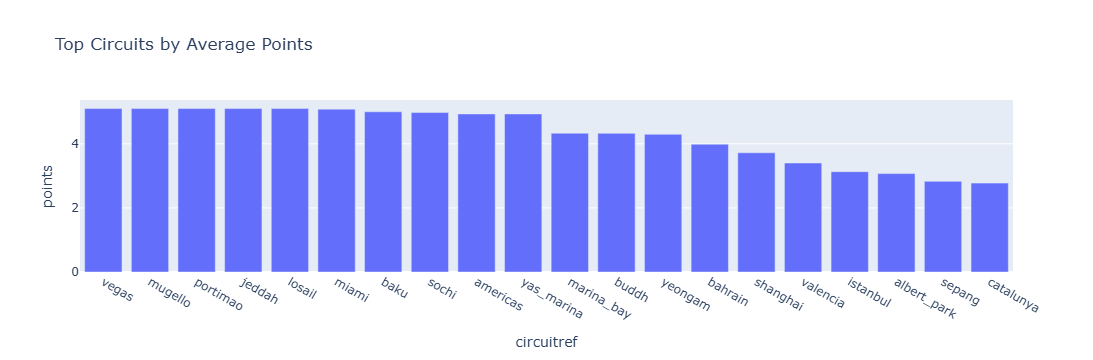

Kolom 'pitstops' tidak ditemukan — menggunakan proxy (laps/grid) sebagai indikator strategi.


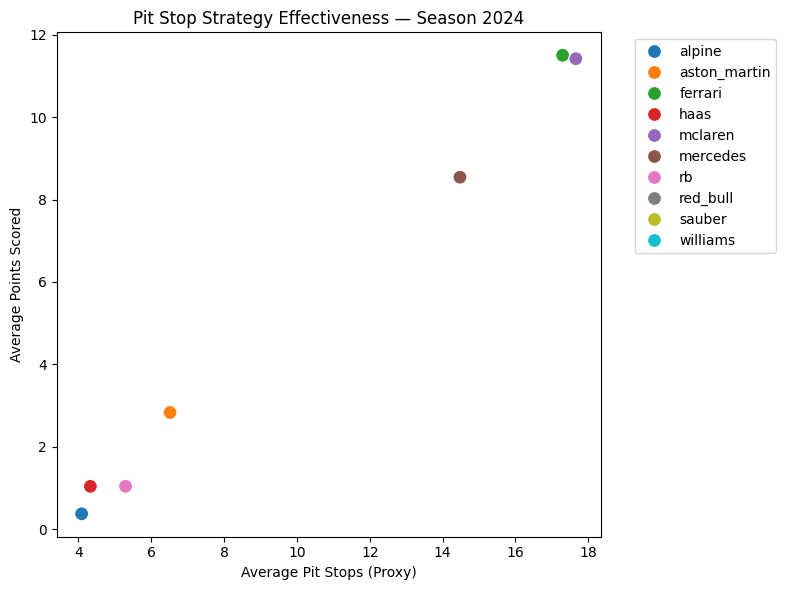

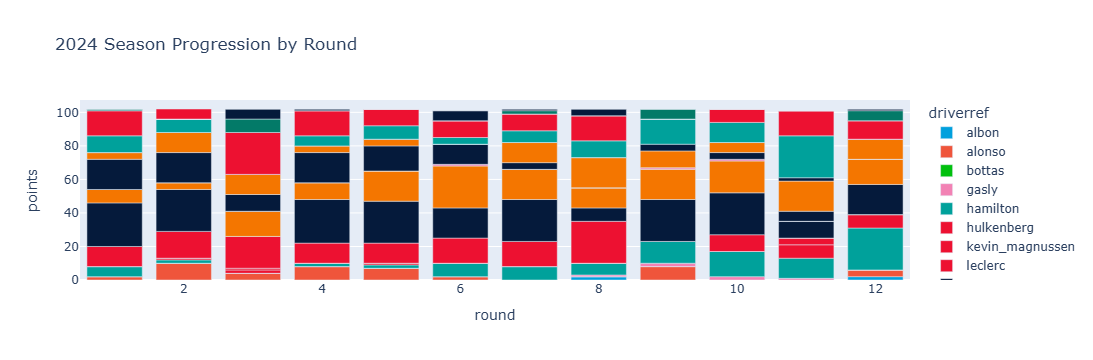

In [ ]:
# Circuit performance analysis
circuit_perf = (
    df.groupby('circuitref')['points']
    .mean().sort_values(ascending=False)
    .reset_index()
)
fig_circ = px.bar(
    circuit_perf.head(20),
    x='circuitref', y='points',
    title="Top Circuits by Average Points"
)
fig_circ.write_html("results/visualizations/dashboard3_circuit_perf.html")
fig_circ.show()

# Strategy effectiveness (grid vs finish)
df_2024 = df[df['year'] == 2024].copy()

# Memastikan kolom 'pitstops' ada, kalau tidak, buat proxy dari laps vs grid vs finish
if 'pitstops' not in df_2024.columns:
    print("Kolom 'pitstops' tidak ditemukan — menggunakan proxy (laps/grid) sebagai indikator strategi.")
    df_2024['pitstops'] = (df_2024['laps'] / df_2024['grid']).fillna(0)

strategy_eff = (
    df_2024.groupby('constructorref')
    .agg(avg_pitstops=('pitstops', 'mean'),
         avg_points=('points', 'mean'),
         avg_position=('position', 'mean'))
    .reset_index()
)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=strategy_eff,
    x='avg_pitstops',
    y='avg_points',
    hue='constructorref',
    s=100,
    palette='tab10'
)
plt.title("Pit Stop Strategy Effectiveness — Season 2024")
plt.xlabel("Average Pit Stops (Proxy)")
plt.ylabel("Average Points Scored")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Real-Time Season Tracking (year: 2024)
season_2024 = df[df['year'] == 2024]
color_map_season_2024 = {
    'albon': '#00A0DD',
    'Alonso': '#037A68',
    'bottas': '#01C00E',
    'gasly': '#F282B4',
    'hamilton': '#00A19B',
    'hulkenberg': '#ED1131',
    'kevin_magnussen': '#ED1131',
    'leclerc': '#ED1131',
    'max_verstappen': '#051A3B',
    'norris': '#F47600',
    'ocon': '#F282B4',
    'perez': '#051A3B',
    'piastri': '#F47600',
    'ricciardo': '#051A3B',
    'russell': '#00A19B',
    'sainz': '#ED1131',
    'sargeant': '#00A0DD',
    'stroll': '#037A68',
    'tsunoda': '#051A3B',
    'zhou': '#01C00E',
    'bearman': '#ED1131'
}

fig_season = px.bar(
    season_2024.groupby(['round','driverref'])['points'].sum().reset_index(),
    x='round', y='points', color='driverref',
    title="2024 Season Progression by Round",
    color_discrete_map=color_map_season_2024
)
fig_season.write_html("results/visualizations/dashboard3_season_2024.html")
fig_season.show()